In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/may-2022/May-2022.csv
/kaggle/input/p-l-march-2021/P  L March 2021.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

May 2022 Dataset

Cleaning:

In [ ]:
df = pd.read_csv("data/Original CSV/May-2022.csv")
df.replace('Nill', np.nan, inplace=True)
df.replace('#VALUE!', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

Preprocessing:

In [3]:
unique_Catalog = df['Product_Catalog'].unique()
Catalog_valuecount = df['Product_Catalog'].value_counts()
Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_Catalog)
print(Catalog_valuecount)
print("Null values:",Catalog_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

le_style = LabelEncoder()
le_catalog = LabelEncoder()

df['Product_Style_ID_encoded'] = le_style.fit_transform(df['Product_Style_ID'])
df['Product_Catalog_encoded'] = le_catalog.fit_transform(df['Product_Catalog'].astype(str))

train_data = df[df['Product_Catalog'].notnull()]
test_data = df[df['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    df.loc[df['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [5]:
Catalog_valuecount = df['Product_Catalog'].value_counts()
print(Catalog_valuecount)

Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Null values:",Catalog_nullcount)

Product_Catalog
Mix            865
Surmaya        230
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 0


In [6]:
unique_Category = df['Product_Category'].unique()
Category_valuecount = df['Product_Category'].value_counts()
Category_nullcount = df['Product_Category'].isnull().sum()
print("Unique Product Category values:", unique_Category)
print(Category_valuecount)
print("Null values:",Category_nullcount)

Unique Product Category values: ['Kurta' 'Kurta Set' 'Gown' 'Tops' nan]
Product_Category
Kurta        820
Kurta Set    360
Tops          45
Gown          32
Name: count, dtype: int64
Null values: 73


In [7]:
le_category = LabelEncoder()

df['Product_Category_encoded'] = le_category.fit_transform(df['Product_Category'].astype(str))

train_data = df[df['Product_Category'].notnull()]
test_data = df[df['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    df.loc[df['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [8]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

df['Product_Weight'] = df.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [9]:
df['Transfer_Price'] = pd.to_numeric(df['Transfer_Price'], errors='coerce')
df['Old_MRP'] = pd.to_numeric(df['Old_MRP'], errors='coerce')
df['Final_Old_MRP'] =pd.to_numeric(df['Final_Old_MRP'], errors='coerce')
df['Ajio_MRP'] = pd.to_numeric(df['Ajio_MRP'], errors='coerce')
df['Amazon_MRP'] = pd.to_numeric(df['Amazon_MRP'], errors='coerce')
df['Amazon_FBA_MRP'] = pd.to_numeric(df['Amazon_FBA_MRP'], errors='coerce')
df['Flipkart_MRP'] = pd.to_numeric(df['Flipkart_MRP'], errors='coerce')
df['Limeroad_MRP'] = pd.to_numeric(df['Limeroad_MRP'], errors='coerce')
df['Myntra_MRP'] = pd.to_numeric(df['Myntra_MRP'], errors='coerce')
df['Paytm_MRP'] = pd.to_numeric(df['Paytm_MRP'], errors='coerce')
df['Snapdeal_MRP'] = pd.to_numeric(df['Snapdeal_MRP'], errors='coerce')
df['Product_Weight'] = pd.to_numeric(df['Product_Weight'], errors='coerce')

In [10]:
df['Product_SKU'] = df['Product_SKU'].astype(str)
df['Product_Style_ID'] = df['Product_Style_ID'].astype(str)
df['Product_Catalog'] = df['Product_Catalog'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

train_data = df[df['Transfer_Price'].notnull()]
test_data = df[df['Transfer_Price'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

df.loc[df['Transfer_Price'].isnull(), 'Transfer_Price'] = predicted_transferprice

In [12]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predicted_values = knn.predict(X_test)

        df.loc[df[column].isnull(), column] = predicted_values

df.drop(columns=['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1330 non-null   float64
 6   Transfer_Price    1330 non-null   float64
 7   Old_MRP           1330 non-null   float64
 8   Final_Old_MRP     1330 non-null   float64
 9   Ajio_MRP          1330 non-null   float64
 10  Amazon_MRP        1330 non-null   float64
 11  Amazon_FBA_MRP    1330 non-null   float64
 12  Flipkart_MRP      1330 non-null   float64
 13  Limeroad_MRP      1330 non-null   float64
 14  Myntra_MRP        1330 non-null   float64
 15  Paytm_MRP         1330 non-null   float64
 16  Snapdeal_MRP      1330 non-null   float64


In [14]:
df['Profit_Ajio'] = df['Final_Old_MRP'] - df['Ajio_MRP']
df['Profit_Amazon'] = df['Final_Old_MRP'] - df['Amazon_MRP']
df['Profit_Amazon_FBA'] = df['Final_Old_MRP'] - df['Amazon_FBA_MRP']
df['Profit_Flipkart'] = df['Final_Old_MRP'] - df['Flipkart_MRP']
df['Profit_Limeroad'] = df['Final_Old_MRP'] - df['Limeroad_MRP']
df['Profit_Myntra'] = df['Final_Old_MRP'] - df['Myntra_MRP']
df['Profit_Paytm'] = df['Final_Old_MRP'] - df['Paytm_MRP']
df['Profit_Snapdeal'] = df['Final_Old_MRP'] - df['Snapdeal_MRP']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1330 non-null   int64  
 1   Product_SKU        1330 non-null   object 
 2   Product_Style_ID   1330 non-null   object 
 3   Product_Catalog    1330 non-null   object 
 4   Product_Category   1330 non-null   object 
 5   Product_Weight     1330 non-null   float64
 6   Transfer_Price     1330 non-null   float64
 7   Old_MRP            1330 non-null   float64
 8   Final_Old_MRP      1330 non-null   float64
 9   Ajio_MRP           1330 non-null   float64
 10  Amazon_MRP         1330 non-null   float64
 11  Amazon_FBA_MRP     1330 non-null   float64
 12  Flipkart_MRP       1330 non-null   float64
 13  Limeroad_MRP       1330 non-null   float64
 14  Myntra_MRP         1330 non-null   float64
 15  Paytm_MRP          1330 non-null   float64
 16  Snapdeal_MRP       1330 

Analysing

In [16]:
import matplotlib.pyplot as plt

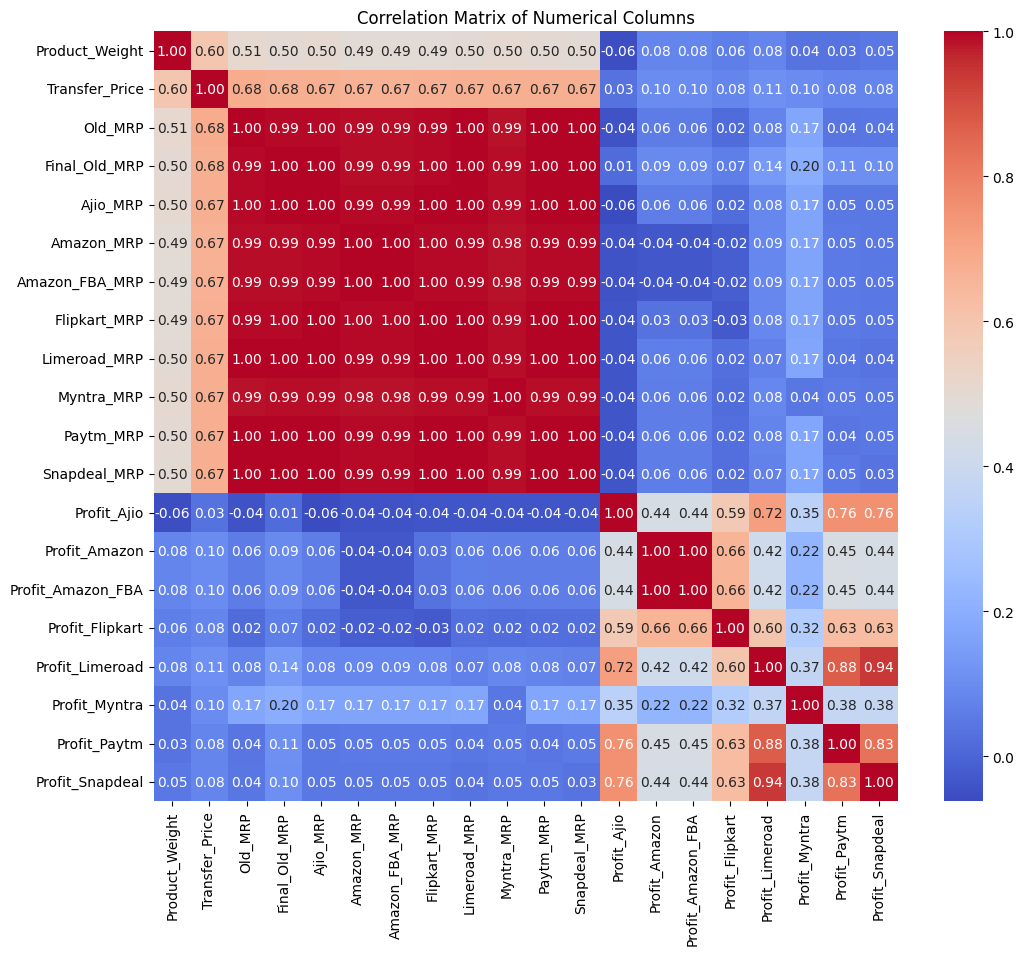

In [17]:
import seaborn as sns
numerical_columns = ['Product_Weight', 'Transfer_Price', 'Old_MRP', 'Final_Old_MRP', 
                     'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 
                     'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP',
                     'Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 
                     'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra',
                     'Profit_Paytm', 'Profit_Snapdeal']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

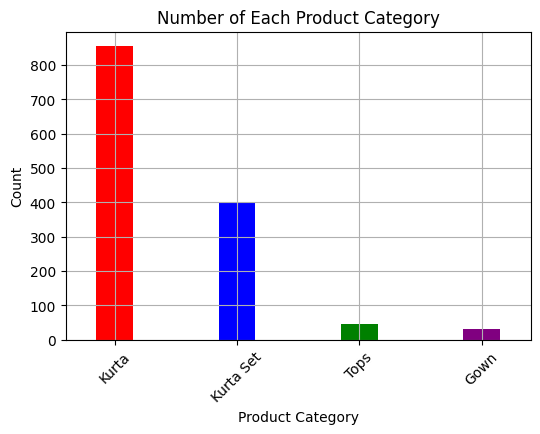

In [18]:
import matplotlib.pyplot as plt
category_counts = df['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
kurta_mean_value = round(df[df['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value = round(df[df['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value = round(df[df['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value = round(df[df['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value}. \nThe Mean price of Gowns is {Gown_mean_value}. \nThe Mean price of Tops is {Tops_mean_value}")

The Mean price of Kurta is 2011.32. 
The Mean price of Kurta Set is 2727.09. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [20]:
mean_values = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values[column] = round(df.groupby('Product_Category')[column].mean(),2)
print(mean_values)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2021.69
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2022.74
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2014.09
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2015.96
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2017.83
Kurta Set    272

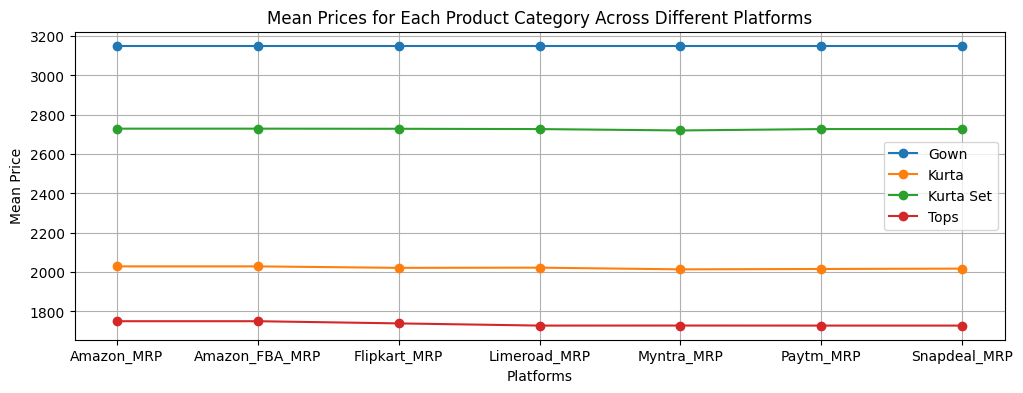

In [21]:
mean_df = pd.DataFrame(mean_values)

plt.figure(figsize=(12, 4))
for category in mean_df.index:
    plt.plot(mean_df.columns, mean_df.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

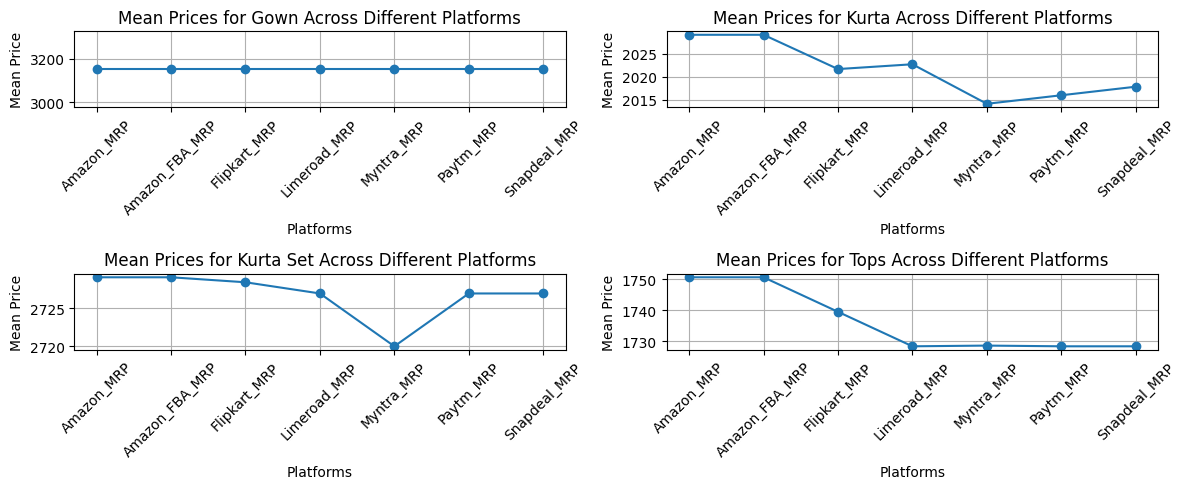

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_df.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_df.columns, mean_df.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

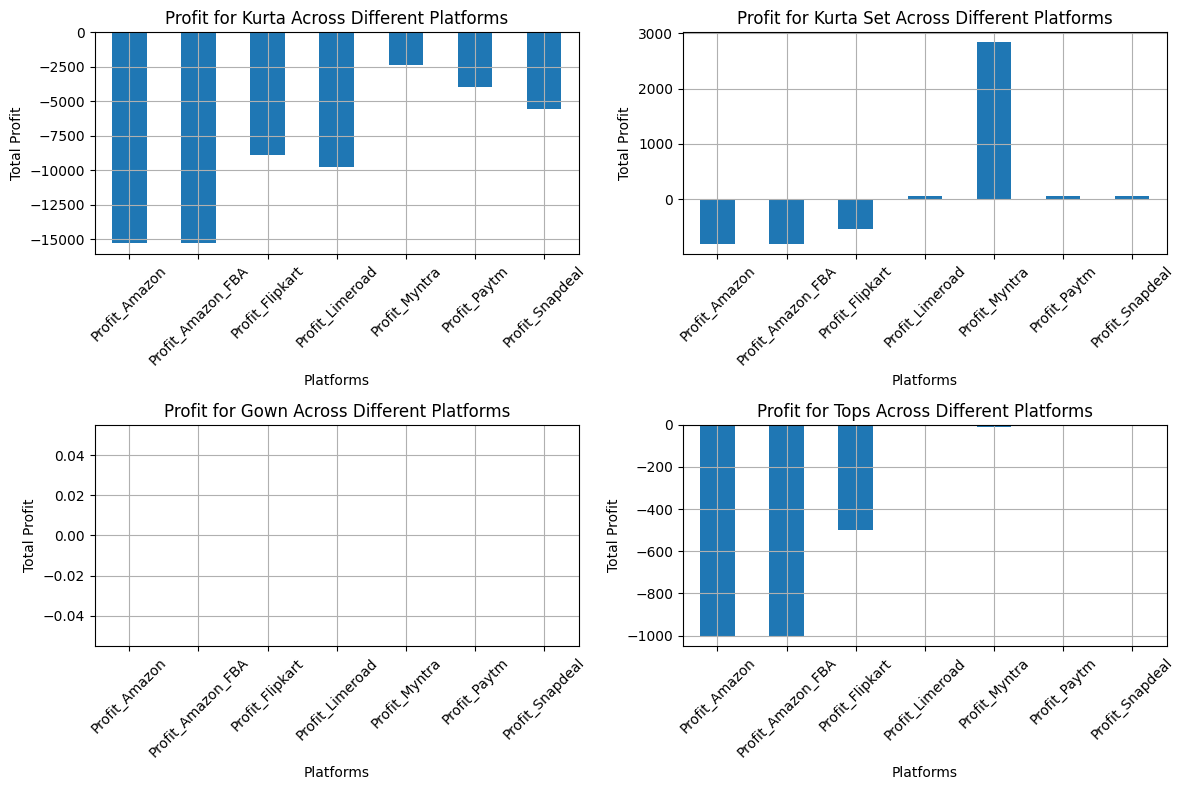

In [23]:
profit = {}
columns = ['Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']
for column in columns:
    profit[column] = round(df.groupby('Product_Category')[column].sum(),2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
profit_df = pd.DataFrame(profit)

categories = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    profit_df.loc[category].plot(kind='bar', ax=ax)
    ax.set_title(f'Profit for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Total Profit')
    ax.tick_params(axis='x', rotation=45)  
    ax.grid(True)

plt.tight_layout()
plt.show()

In [24]:
total_profit = {
    'Amazon': df['Profit_Amazon'].sum(),
    'Amazon_FBA': df['Profit_Amazon_FBA'].sum(),
    'Flipkart': df['Profit_Flipkart'].sum(),
    'Limeroad': df['Profit_Limeroad'].sum(),
    'Myntra': df['Profit_Myntra'].sum(),
    'Paytm': df['Profit_Paytm'].sum(),
    'Snapdeal': df['Profit_Snapdeal'].sum()
}

total_profit_df = pd.DataFrame(list(total_profit.items()), columns=['Platform', 'Total Profit'])
print(total_profit_df)

     Platform  Total Profit
0      Amazon -17081.333333
1  Amazon_FBA -17081.333333
2    Flipkart  -9902.333333
3    Limeroad  -9714.333333
4      Myntra    459.666667
5       Paytm  -3914.333333
6    Snapdeal  -5514.333333


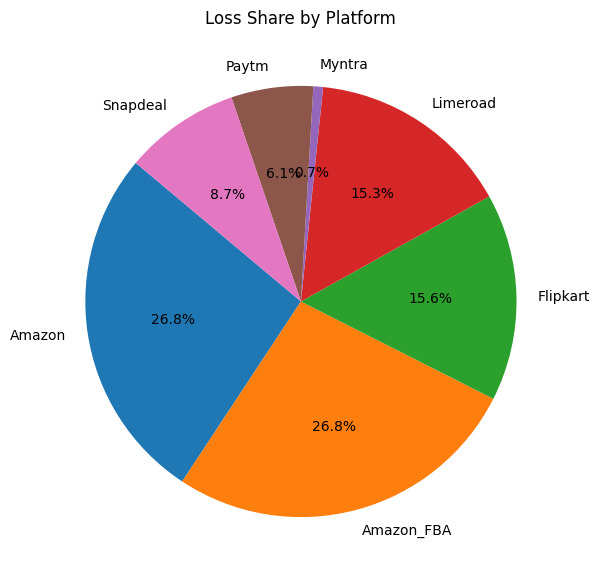

In [25]:
total_profit_df = pd.DataFrame(list(total_profit.items()), columns=['Platform', 'Total Profit'])

total_profit_df.loc[total_profit_df['Total Profit'] < 0, 'Total Profit'] *= -1

loss_df = total_profit_df[total_profit_df['Total Profit'] > 0]

plt.figure(figsize=(10, 7))
plt.pie(loss_df['Total Profit'], labels=loss_df['Platform'], autopct='%1.1f%%', startangle=140)
plt.title('Loss Share by Platform')
plt.show()

In [26]:
mean_profit_df = {
    'Amazon': df['Profit_Amazon'].mean(),
    'Amazon_FBA': df['Profit_Amazon_FBA'].mean(),
    'Flipkart': df['Profit_Flipkart'].mean(),
    'Limeroad': df['Profit_Limeroad'].mean(),
    'Myntra': df['Profit_Myntra'].mean(),
    'Paytm': df['Profit_Paytm'].mean(),
    'Snapdeal': df['Profit_Snapdeal'].mean()
}

mean_profit = pd.DataFrame(list(mean_profit_df.items()), columns=['Platform', 'Total Profit'])
print(mean_profit)

     Platform  Total Profit
0      Amazon    -12.843108
1  Amazon_FBA    -12.843108
2    Flipkart     -7.445363
3    Limeroad     -7.304010
4      Myntra      0.345614
5       Paytm     -2.943108
6    Snapdeal     -4.146115


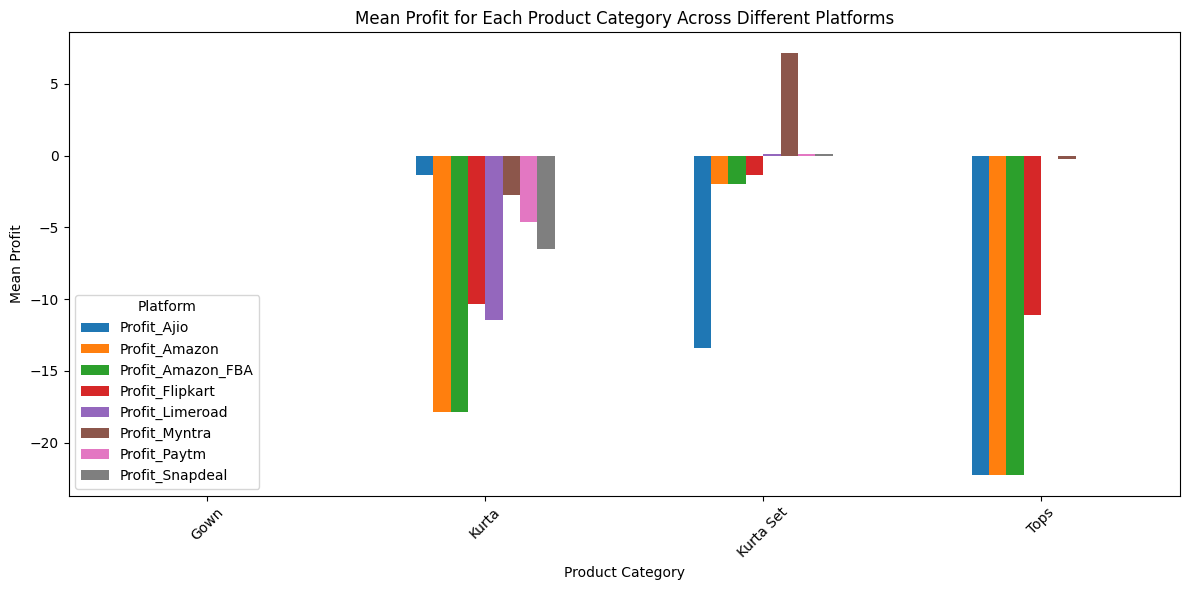

In [27]:
mean_profit = df.groupby('Product_Category')[['Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']].mean()

mean_profit.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Profit for Each Product Category Across Different Platforms')
plt.xlabel('Product Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

P L March 2021

Cleaning

In [28]:
ds = pd.read_csv("/kaggle/input/p-l-march-2021/P  L March 2021.csv")
ds.replace('Nill', np.nan, inplace=True)
ds.replace('#VALUE!', np.nan, inplace=True)
ds.rename(columns=lambda x: x.strip(), inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1257 non-null   object
 4   Product_Category        1257 non-null   object
 5   Product_Weight          1257 non-null   object
 6   Transfer_Price_Level_1  1324 non-null   object
 7   Transfer_Price_Level_2  1324 non-null   object
 8   Old_MRP                 1293 non-null   object
 9   Final_Old_MRP           1293 non-null   object
 10  Ajio_MRP                1293 non-null   object
 11  Amazon_MRP              1293 non-null   object
 12  Amazon_FBA_MRP          1293 non-null   object
 13  Flipkart_MRP            1293 non-null   object
 14  Limeroad_MRP            1293 non-null   object
 15  Mynt

In [29]:
ds.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Preprocessing:

In [30]:
unique_CatalogforMarch = ds['Product_Catalog'].unique()
CatalogforMarch_valuecount = ds['Product_Catalog'].value_counts()
CatalogforMarch_nullcount = ds['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_CatalogforMarch)
print(CatalogforMarch_valuecount)
print("Null values:",CatalogforMarch_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [32]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

ds['Product_Style_ID_encoded'] = le_style.fit_transform(ds['Product_Style_ID'])
ds['Product_Catalog_encoded'] = le_catalog.fit_transform(ds['Product_Catalog'].astype(str))

train_data = ds[ds['Product_Catalog'].notnull()]
test_data = ds[ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    ds.loc[ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [33]:
le_category = LabelEncoder()

ds['Product_Category_encoded'] = le_category.fit_transform(ds['Product_Category'].astype(str))

train_data = ds[ds['Product_Category'].notnull()]
test_data = ds[ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    ds.loc[ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [34]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

ds['Product_Weight'] = ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [35]:
ds['Transfer_Price_Level_1'] = pd.to_numeric(ds['Transfer_Price_Level_1'], errors='coerce')
ds['Transfer_Price_Level_2'] = pd.to_numeric(ds['Transfer_Price_Level_2'], errors='coerce')
ds['Old_MRP'] = pd.to_numeric(ds['Old_MRP'], errors='coerce')
ds['Final_Old_MRP'] =pd.to_numeric(ds['Final_Old_MRP'], errors='coerce')
ds['Ajio_MRP'] = pd.to_numeric(ds['Ajio_MRP'], errors='coerce')
ds['Amazon_MRP'] = pd.to_numeric(ds['Amazon_MRP'], errors='coerce')
ds['Amazon_FBA_MRP'] = pd.to_numeric(ds['Amazon_FBA_MRP'], errors='coerce')
ds['Flipkart_MRP'] = pd.to_numeric(ds['Flipkart_MRP'], errors='coerce')
ds['Limeroad_MRP'] = pd.to_numeric(ds['Limeroad_MRP'], errors='coerce')
ds['Myntra_MRP'] = pd.to_numeric(ds['Myntra_MRP'], errors='coerce')
ds['Paytm_MRP'] = pd.to_numeric(ds['Paytm_MRP'], errors='coerce')
ds['Snapdeal_MRP'] = pd.to_numeric(ds['Snapdeal_MRP'], errors='coerce')
ds['Product_Weight'] = pd.to_numeric(ds['Product_Weight'], errors='coerce')

In [36]:
ds['Product_SKU'] = ds['Product_SKU'].astype(str)
ds['Product_Style_ID'] = ds['Product_Style_ID'].astype(str)
ds['Product_Catalog'] = ds['Product_Catalog'].astype(str)
ds['Product_Category'] = ds['Product_Category'].astype(str)

In [37]:
train_data = ds[ds['Transfer_Price_Level_1'].notnull()]
test_data = ds[ds['Transfer_Price_Level_1'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_1']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_1'].isnull(), 'Transfer_Price_Level_1'] = predicted_transferprice

In [38]:
train_data = ds[ds['Transfer_Price_Level_2'].notnull()]
test_data = ds[ds['Transfer_Price_Level_2'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_2']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_2'].isnull(), 'Transfer_Price_Level_2'] = predicted_transferprice

In [39]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = ds[ds[column].notnull()]
    test_data = ds[ds[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        
        predicted_values = knn.predict(X_test)
        
        ds.loc[ds[column].isnull(), column] = predicted_values


ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [40]:
ds['Profit_Ajio'] = ds['Final_Old_MRP'] - ds['Ajio_MRP']
ds['Profit_Amazon'] = ds['Final_Old_MRP'] - ds['Amazon_MRP']
ds['Profit_Amazon_FBA'] = ds['Final_Old_MRP'] - ds['Amazon_FBA_MRP']
ds['Profit_Flipkart'] = ds['Final_Old_MRP'] - ds['Flipkart_MRP']
ds['Profit_Limeroad'] = ds['Final_Old_MRP'] - ds['Limeroad_MRP']
ds['Profit_Myntra'] = ds['Final_Old_MRP'] - ds['Myntra_MRP']
ds['Profit_Paytm'] = ds['Final_Old_MRP'] - ds['Paytm_MRP']
ds['Profit_Snapdeal'] = ds['Final_Old_MRP'] - ds['Snapdeal_MRP']

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1330 non-null   float64
 6   Transfer_Price_Level_1  1330 non-null   float64
 7   Transfer_Price_Level_2  1330 non-null   float64
 8   Old_MRP                 1330 non-null   float64
 9   Final_Old_MRP           1330 non-null   float64
 10  Ajio_MRP                1330 non-null   float64
 11  Amazon_MRP              1330 non-null   float64
 12  Amazon_FBA_MRP          1330 non-null   float64
 13  Flipkart_MRP            1330 non-null   float64
 14  Limeroad_MRP            1330 non-null   

Analyzing

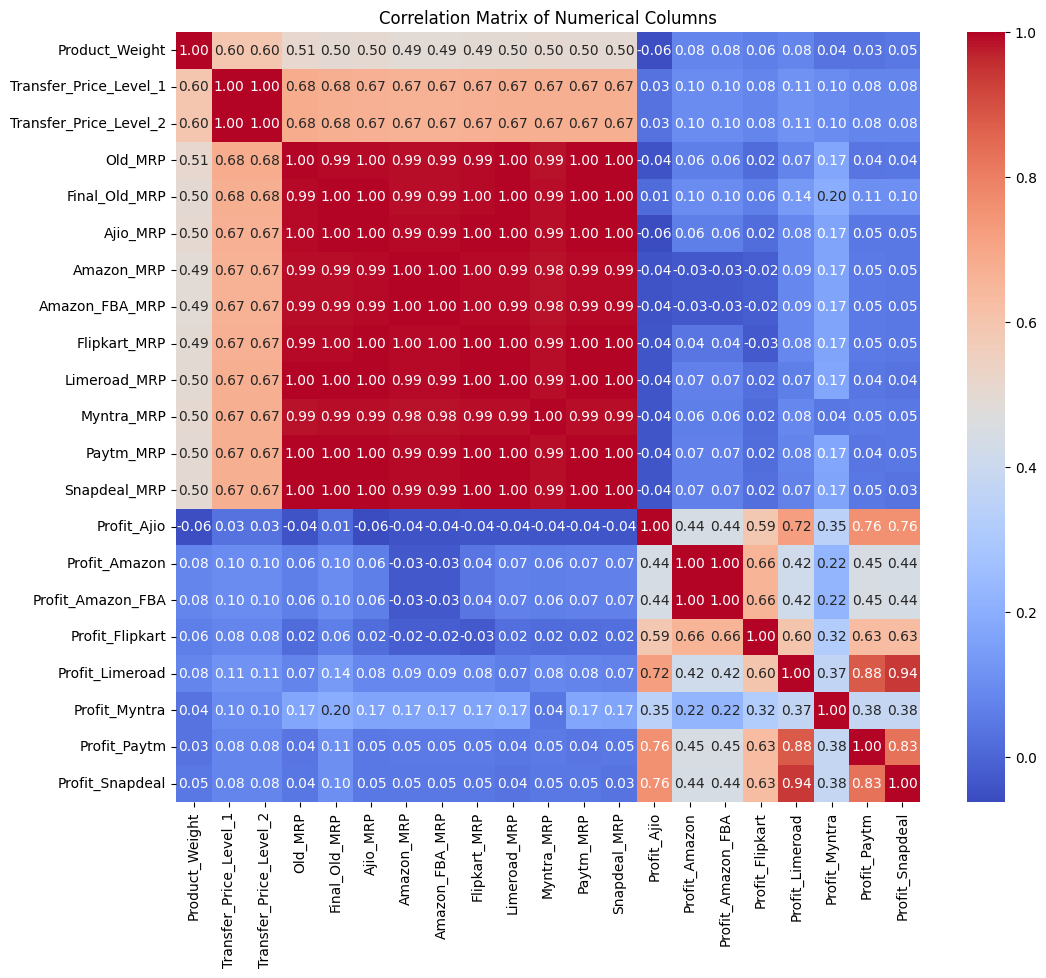

In [42]:
numerical_columns = ['Product_Weight', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2', 'Old_MRP', 'Final_Old_MRP', 
                     'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 
                     'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP',
                     'Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 
                     'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra',
                     'Profit_Paytm', 'Profit_Snapdeal']

correlation_matrix = ds[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

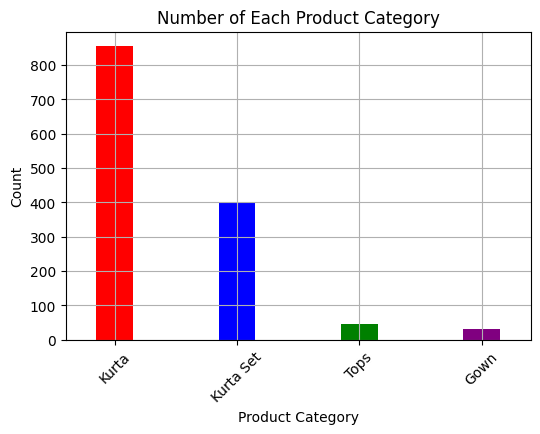

In [43]:
category_counts = ds['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [44]:
kurta_mean_value_ds = round(ds[ds['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value_ds = round(ds[ds['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value_ds = round(ds[ds['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value_ds = round(ds[ds['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value_ds}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value_ds}. \nThe Mean price of Gowns is {Gown_mean_value_ds}. \nThe Mean price of Tops is {Tops_mean_value_ds}")

The Mean price of Kurta is 2007.82. 
The Mean price of Kurta Set is 2727.09. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [45]:
mean_values_ds = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values_ds[column] = round(ds.groupby('Product_Category')[column].mean(),2)
print(mean_values_ds)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2018.19
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2019.24
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2010.59
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2012.46
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2014.33
Kurta Set    272

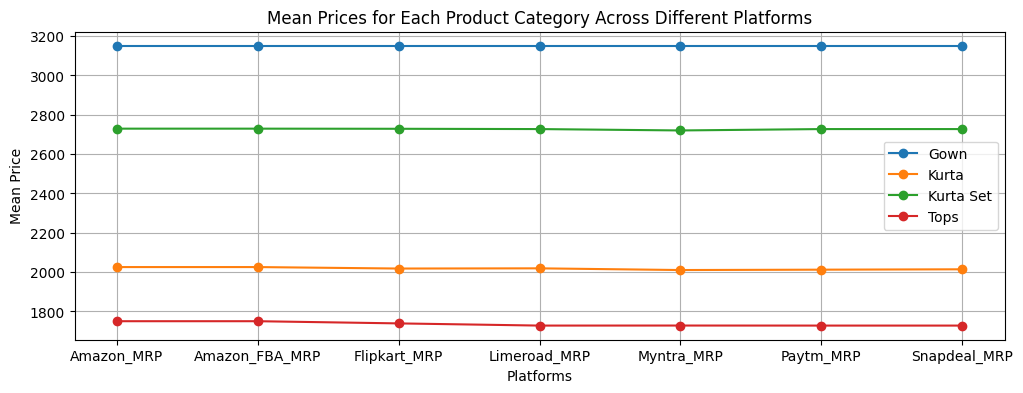

In [46]:
mean_ds = pd.DataFrame(mean_values_ds)

plt.figure(figsize=(12, 4))
for category in mean_ds.index:
    plt.plot(mean_ds.columns, mean_ds.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

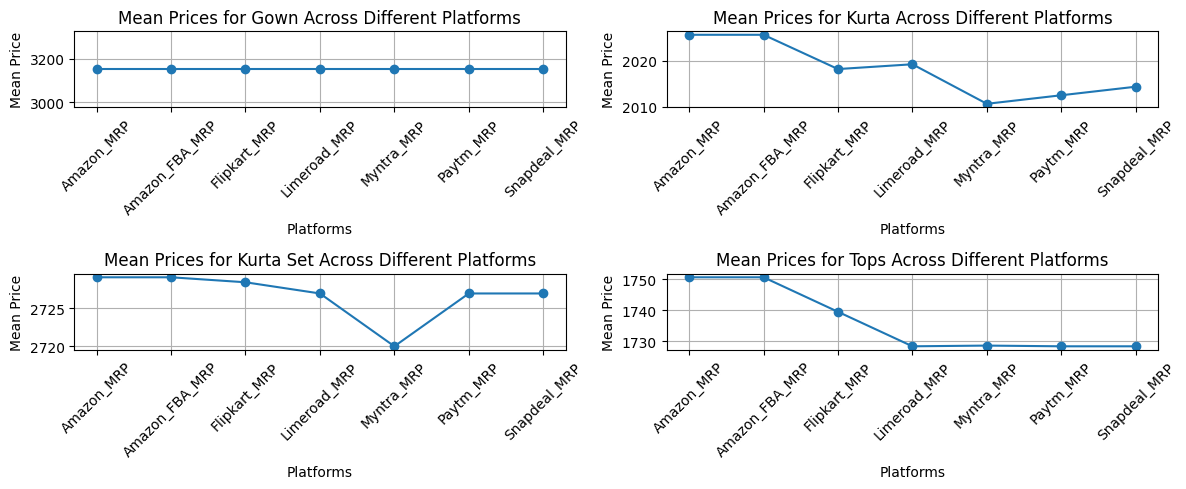

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_ds.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_ds.columns, mean_ds.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

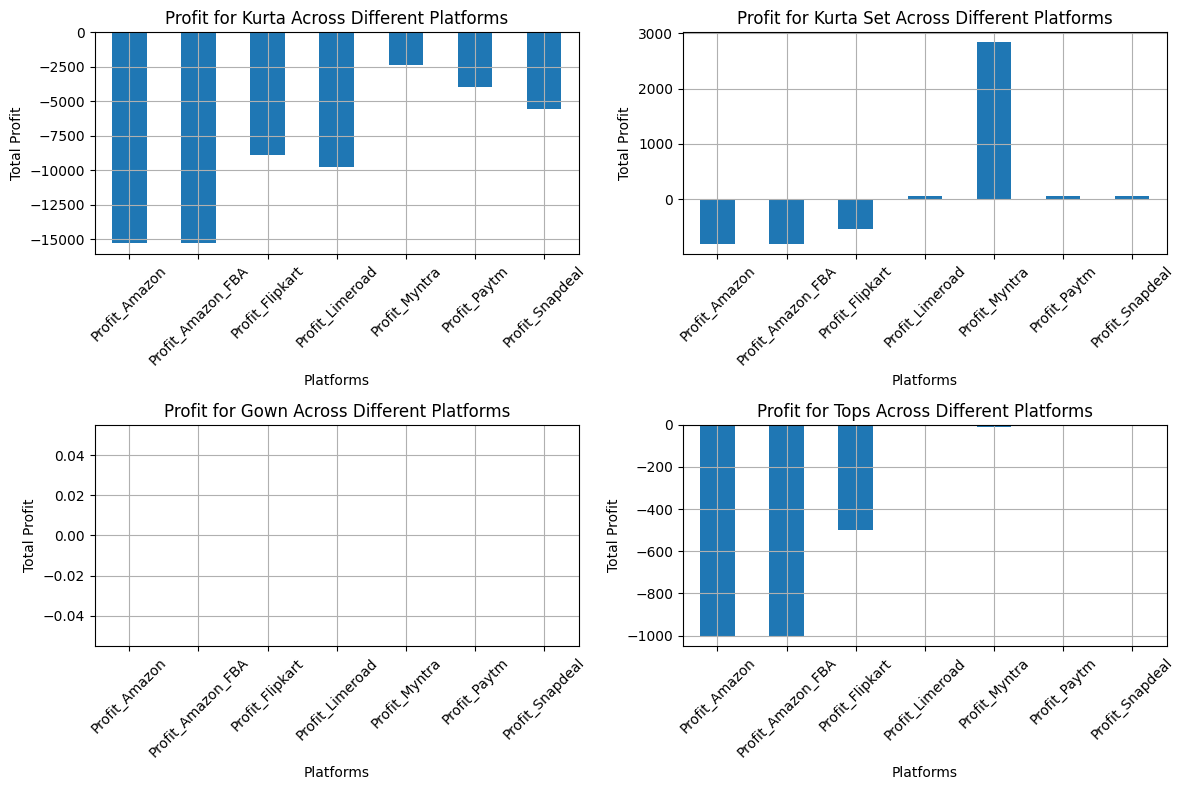

In [48]:
profit_ds = {}
columns = ['Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']
for column in columns:
    profit_ds[column] = round(ds.groupby('Product_Category')[column].sum(),2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
profit_ds = pd.DataFrame(profit_ds)

categories = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    profit_ds.loc[category].plot(kind='bar', ax=ax)
    ax.set_title(f'Profit for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Total Profit')
    ax.tick_params(axis='x', rotation=45)  
    ax.grid(True)

plt.tight_layout()
plt.show()

In [49]:
total_profit_ds = {
    'Amazon': ds['Profit_Amazon'].sum(),
    'Amazon_FBA': ds['Profit_Amazon_FBA'].sum(),
    'Flipkart': ds['Profit_Flipkart'].sum(),
    'Limeroad': ds['Profit_Limeroad'].sum(),
    'Myntra': ds['Profit_Myntra'].sum(),
    'Paytm': ds['Profit_Paytm'].sum(),
    'Snapdeal': ds['Profit_Snapdeal'].sum()
}

df_total_profit = pd.DataFrame(list(total_profit_ds.items()), columns=['Platform', 'Total Profit'])
print(df_total_profit)

     Platform  Total Profit
0      Amazon -17081.333333
1  Amazon_FBA -17081.333333
2    Flipkart  -9902.333333
3    Limeroad  -9714.333333
4      Myntra    459.666667
5       Paytm  -3914.333333
6    Snapdeal  -5514.333333


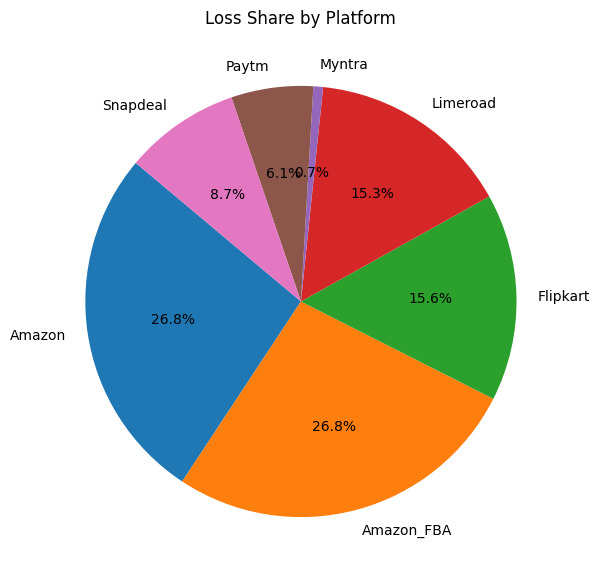

In [50]:
df_total_profit.loc[df_total_profit['Total Profit'] < 0, 'Total Profit'] *= -1
df_total_profit['Total Profit'] = pd.to_numeric(total_profit_df['Total Profit'], errors='coerce')

loss_ds = df_total_profit[df_total_profit['Platform'] != 'Profit_Myntra']

plt.figure(figsize=(10, 7))
plt.pie(loss_ds['Total Profit'], labels=loss_ds['Platform'], autopct='%1.1f%%', startangle=140)
plt.title('Loss Share by Platform')
plt.show()

In [51]:
mean_profit_ds = {
    'Amazon': ds['Profit_Amazon'].mean(),
    'Amazon_FBA': ds['Profit_Amazon_FBA'].mean(),
    'Flipkart': ds['Profit_Flipkart'].mean(),
    'Limeroad': ds['Profit_Limeroad'].mean(),
    'Myntra': ds['Profit_Myntra'].mean(),
    'Paytm': ds['Profit_Paytm'].mean(),
    'Snapdeal': ds['Profit_Snapdeal'].mean()
}

df_mean_profit = pd.DataFrame(list(mean_profit_ds.items()), columns=['Platform', 'Total Profit'])
print(df_mean_profit)

     Platform  Total Profit
0      Amazon    -12.843108
1  Amazon_FBA    -12.843108
2    Flipkart     -7.445363
3    Limeroad     -7.304010
4      Myntra      0.345614
5       Paytm     -2.943108
6    Snapdeal     -4.146115


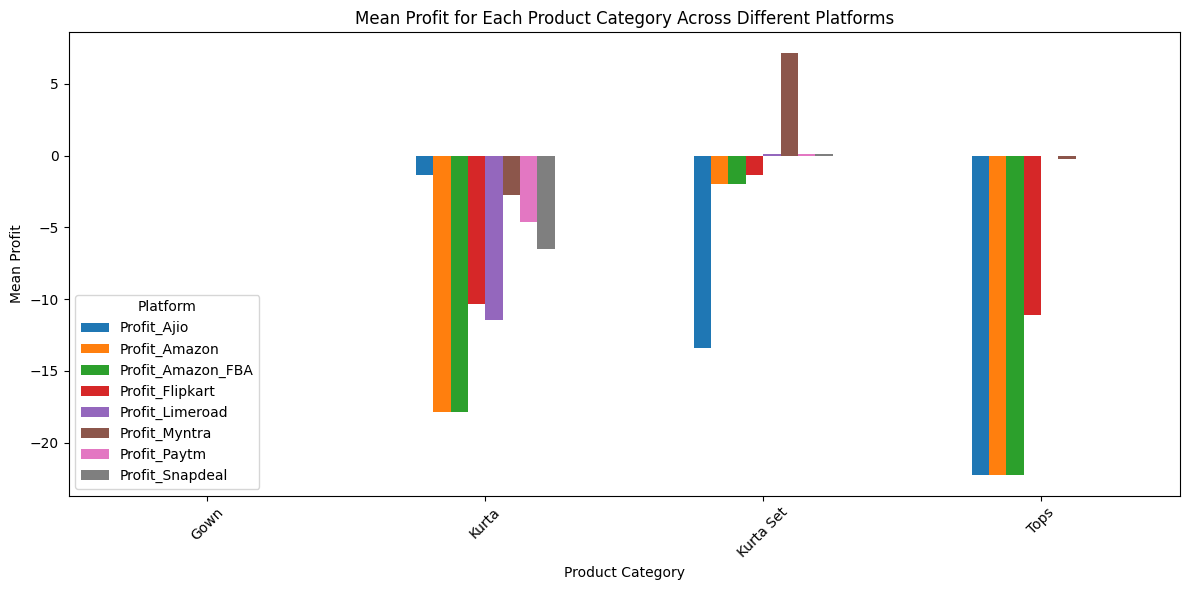

In [52]:
ds_mean_profit = ds.groupby('Product_Category')[['Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']].mean()

ds_mean_profit.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Profit for Each Product Category Across Different Platforms')
plt.xlabel('Product Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

Analyzing Both datasets

In [53]:
March_prices = {}
May_prices = {}
columns = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for column in columns:
    March_prices[column] = round(ds[ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
    May_prices[column] = round(df[df['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
print(March_prices)
print(May_prices)

{'Kurta': 2007.82, 'Kurta Set': 2727.09, 'Gown': 3151.25, 'Tops': 1728.33}
{'Kurta': 2011.32, 'Kurta Set': 2727.09, 'Gown': 3151.25, 'Tops': 1728.33}


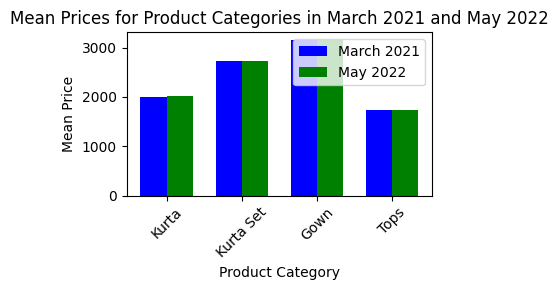

In [54]:
data = {
    'Category': ['Kurta', 'Kurta Set', 'Gown', 'Tops'],
    'March_2021': [2007.82, 2727.09, 3151.25, 1728.33],
    'May_2022': [2011.32, 2727.09, 3151.25, 1728.33]
}
data = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(4, 3))

bar_width = 0.35
index = range(len(data['Category']))

bar1 = ax.bar(index, data['March_2021'], bar_width, label='March 2021', color='b')
bar2 = ax.bar([i + bar_width for i in index], data['May_2022'], bar_width, label='May 2022', color='g')

ax.set_xlabel('Product Category')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Prices for Product Categories in March 2021 and May 2022')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Category'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dropping columns:

In [55]:
May_ds = pd.read_csv("/kaggle/input/may-2022/May-2022.csv")
March_ds = pd.read_csv("/kaggle/input/p-l-march-2021/P  L March 2021.csv")
May_ds.replace('Nill', np.nan, inplace=True)
May_ds.replace('#VALUE!', np.nan, inplace=True)

March_ds.replace('Nill', np.nan, inplace=True)
March_ds.replace('#VALUE!', np.nan, inplace=True)
March_ds.rename(columns=lambda x: x.strip(), inplace=True)
print(May_ds.info())
March_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

In [56]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

March_ds['Product_Style_ID_encoded'] = le_style.fit_transform(March_ds['Product_Style_ID'])
March_ds['Product_Catalog_encoded'] = le_catalog.fit_transform(March_ds['Product_Catalog'].astype(str))

train_data = March_ds[March_ds['Product_Catalog'].notnull()]
test_data = March_ds[March_ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    March_ds.loc[March_ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [57]:
May_ds['Product_Style_ID_encoded'] = le_style.fit_transform(May_ds['Product_Style_ID'])
May_ds['Product_Catalog_encoded'] = le_catalog.fit_transform(May_ds['Product_Catalog'].astype(str))

train_data = May_ds[May_ds['Product_Catalog'].notnull()]
test_data = May_ds[May_ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    May_ds.loc[May_ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [58]:
le_category = LabelEncoder()

March_ds['Product_Category_encoded'] = le_category.fit_transform(March_ds['Product_Category'].astype(str))

train_data = March_ds[March_ds['Product_Category'].notnull()]
test_data = March_ds[March_ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    March_ds.loc[March_ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [59]:
May_ds['Product_Category_encoded'] = le_category.fit_transform(May_ds['Product_Category'].astype(str))

train_data = May_ds[May_ds['Product_Category'].notnull()]
test_data = May_ds[May_ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    May_ds.loc[May_ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [60]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

March_ds['Product_Weight'] = March_ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)
May_ds['Product_Weight'] = May_ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [61]:
March_ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)
May_ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [62]:
March_ds = March_ds.dropna(axis=0, how='any')
May_ds = May_ds.dropna(axis=0, how='any')

In [63]:
March_ds['Transfer_Price_Level_1'] = pd.to_numeric(March_ds['Transfer_Price_Level_1'], errors='coerce')
March_ds['Transfer_Price_Level_2'] = pd.to_numeric(March_ds['Transfer_Price_Level_2'], errors='coerce')
March_ds['Old_MRP'] = pd.to_numeric(March_ds['Old_MRP'], errors='coerce')
March_ds['Final_Old_MRP'] =pd.to_numeric(March_ds['Final_Old_MRP'], errors='coerce')
March_ds['Ajio_MRP'] = pd.to_numeric(March_ds['Ajio_MRP'], errors='coerce')
March_ds['Amazon_MRP'] = pd.to_numeric(March_ds['Amazon_MRP'], errors='coerce')
March_ds['Amazon_FBA_MRP'] = pd.to_numeric(March_ds['Amazon_FBA_MRP'], errors='coerce')
March_ds['Flipkart_MRP'] = pd.to_numeric(March_ds['Flipkart_MRP'], errors='coerce')
March_ds['Limeroad_MRP'] = pd.to_numeric(March_ds['Limeroad_MRP'], errors='coerce')
March_ds['Myntra_MRP'] = pd.to_numeric(March_ds['Myntra_MRP'], errors='coerce')
March_ds['Paytm_MRP'] = pd.to_numeric(March_ds['Paytm_MRP'], errors='coerce')
March_ds['Snapdeal_MRP'] = pd.to_numeric(March_ds['Snapdeal_MRP'], errors='coerce')
March_ds['Product_Weight'] = pd.to_numeric(March_ds['Product_Weight'], errors='coerce')

In [64]:
May_ds['Transfer_Price'] = pd.to_numeric(May_ds['Transfer_Price'], errors='coerce')
May_ds['Old_MRP'] = pd.to_numeric(May_ds['Old_MRP'], errors='coerce')
May_ds['Final_Old_MRP'] =pd.to_numeric(May_ds['Final_Old_MRP'], errors='coerce')
May_ds['Ajio_MRP'] = pd.to_numeric(May_ds['Ajio_MRP'], errors='coerce')
May_ds['Amazon_MRP'] = pd.to_numeric(May_ds['Amazon_MRP'], errors='coerce')
May_ds['Amazon_FBA_MRP'] = pd.to_numeric(May_ds['Amazon_FBA_MRP'], errors='coerce')
May_ds['Flipkart_MRP'] = pd.to_numeric(May_ds['Flipkart_MRP'], errors='coerce')
May_ds['Limeroad_MRP'] = pd.to_numeric(May_ds['Limeroad_MRP'], errors='coerce')
May_ds['Myntra_MRP'] = pd.to_numeric(May_ds['Myntra_MRP'], errors='coerce')
May_ds['Paytm_MRP'] = pd.to_numeric(May_ds['Paytm_MRP'], errors='coerce')
May_ds['Snapdeal_MRP'] = pd.to_numeric(May_ds['Snapdeal_MRP'], errors='coerce')
May_ds['Product_Weight'] = pd.to_numeric(May_ds['Product_Weight'], errors='coerce')

In [65]:
print(March_ds.info())
May_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1293 non-null   int64  
 1   Product_SKU             1293 non-null   object 
 2   Product_Style_ID        1293 non-null   object 
 3   Product_Catalog         1293 non-null   object 
 4   Product_Category        1293 non-null   object 
 5   Product_Weight          1293 non-null   float64
 6   Transfer_Price_Level_1  1293 non-null   float64
 7   Transfer_Price_Level_2  1293 non-null   float64
 8   Old_MRP                 1293 non-null   float64
 9   Final_Old_MRP           1293 non-null   float64
 10  Ajio_MRP                1293 non-null   float64
 11  Amazon_MRP              1293 non-null   float64
 12  Amazon_FBA_MRP          1293 non-null   float64
 13  Flipkart_MRP            1293 non-null   float64
 14  Limeroad_MRP            1293 non-null   float

In [66]:
March_prices = {}
May_prices = {}
columns = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for column in columns:
    March_prices[column] = round(March_ds[March_ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
    May_prices[column] = round(May_ds[May_ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
print(March_prices)
print(May_prices)

{'Kurta': 2002.25, 'Kurta Set': 2732.41, 'Gown': 3151.25, 'Tops': 1728.33}
{'Kurta': 2002.25, 'Kurta Set': 2732.41, 'Gown': 3151.25, 'Tops': 1728.33}
